In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.api.types import CategoricalDtype

In [44]:
shipments = pd.read_csv("Shipments_2020.csv")
depletions = pd.read_csv("Depletions_2020.csv")

In [45]:
shipments["  Prod Desc."].unique()
shipments = shipments.drop(columns = ["Ship Date", "Distributor"])

In [46]:
shipments["Sum of FOB"] = shipments["Sum of FOB"].replace({"\$": ""}, regex = True) 
shipments["Sum of FOB"] = shipments["Sum of FOB"].replace({",": ""}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({" CC Brut Rosé| CC Chardonnay| CC Re d Blend":"CC"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"CC Sauvignon Blanc|CC Chardonnay|CC Re d Blend|CC Brut Rose| CC Sauvignon Blanc Keg|CC Chardonnay KEG|CC Brut Rose - Hawkes Bay":"CC"}, regex = True) 
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"CC Brut Rose| CC Sauvignon Blanc Keg| CC Chardonnay KEG|CC Brut Rose - Hawkes Bay":"CC"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"CC KEG|CC - Hawkes Bay":"CC"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"SHE CAN Sauvignon Blanc|SHE CAN Coasta l Berry Spritzer":"SHE CAN"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"SHE CAN Rosé|SHE CAN Island Citrus Spr itzer":"SHE CAN"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"BLACK GIRL MAGIC Riesling|BLACK GIRL M AGIC Red Blend":"Black Girl Magic"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"BLACK GIRL MAGIC Rosé|Black Girl Magic Riesling":"Black Girl Magic"}, regex = True)
shipments["  Prod Desc."] = shipments["  Prod Desc."].replace({"Black Girl Magic Rosé|Black Girl Magic Red Blend|Black Girl Magic Brut":"Black Girl Magic"}, regex = True)
shipments.drop(shipments.tail(1).index,inplace=True)
shipments['Sum of FOB'] = shipments['Sum of FOB'].astype(int)
shipments

,Prod Desc.,State,Sum of FOB,Sum of CS Quantity
0,CC,WA,3108,28
1,CC,WA,2464,28
2,CC Red Blend,WA,3696,42
3,CC,WA,5280,60
4,CC Red Blend,TN,440,5
5,Black Girl Magic,TN,770,7
6,CC,TN,176,2
7,CC,TN,5808,66
8,CC,WI,4928,56
9,BLACK GIRL MAGIC Red Blend,NY,420,3


In [47]:
bgm = shipments.where(shipments["  Prod Desc."] == "Black Girl Magic").pivot_table(index = "State", values = ["Sum of FOB"], aggfunc = sum)
BGM = bgm.rename(columns = {"Sum of FOB": "BGM"})
cc = shipments.where(shipments["  Prod Desc."] == "CC").pivot_table(index = "State", values = ["Sum of FOB"], aggfunc = sum)
CC = cc.rename(columns = {"Sum of FOB": "CC"})
shecan = shipments.where(shipments["  Prod Desc."] == "SHE CAN").pivot_table(index = "State", values = ["Sum of FOB"], aggfunc = sum)
SHECAN = shecan.rename(columns = {"Sum of FOB": "SHECAN"})
BGM

,BGM
State,
AL,14000.0
AR,27250.0
AZ,45140.0
CA,178080.0
CO,7420.0
CT,12320.0
DC,10080.0
DE,24460.0
FL,70000.0


<function matplotlib.pyplot.show(*args, **kw)>

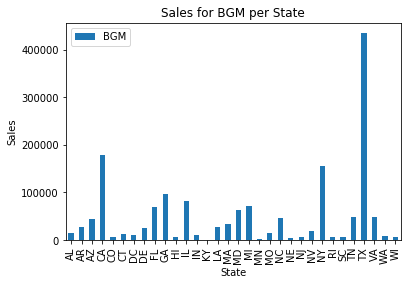

<Figure size 1728x1296 with 0 Axes>

In [50]:
BGM_Plot = BGM.plot.bar()
BGM_Plot.set_xlabel("State")
BGM_Plot.set_ylabel("Sales")
BGM_Plot.set_title("Sales for BGM per State")
plt.figure(figsize=(24, 18))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

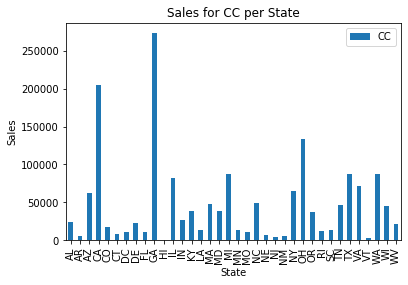

<Figure size 1728x1296 with 0 Axes>

In [51]:
CC_Plot = CC.plot.bar()
CC_Plot.set_xlabel("State")
CC_Plot.set_ylabel("Sales")
CC_Plot.set_title("Sales for CC per State")
plt.figure(figsize=(24, 18))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

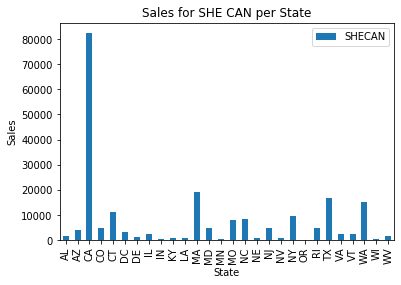

<Figure size 576x432 with 0 Axes>

In [52]:
SHECAN_Plot = SHECAN.plot.bar()
SHECAN_Plot.set_xlabel("State")
SHECAN_Plot.set_ylabel("Sales")
SHECAN_Plot.set_title("Sales for SHE CAN per State")
plt.figure(figsize=(8, 6))
plt.show

In [53]:
aggregate = pd.concat([BGM, CC, SHECAN], axis = 1, sort = False)
aggregate.fillna(0)
aggregate

,BGM,CC,SHECAN
AL,14000.0,24352.0,1600.0
AR,27250.0,5572.0,NaN
AZ,45140.0,62304.0,4000.0
CA,178080.0,205032.0,82400.0
CO,7420.0,16806.0,4720.0
CT,12320.0,7359.0,11200.0
DC,10080.0,10852.0,3200.0
DE,24460.0,22489.0,1280.0
FL,70000.0,10500.0,NaN
GA,96880.0,273626.0,NaN


<function matplotlib.pyplot.show(*args, **kw)>

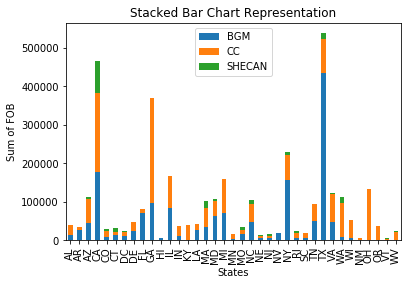

<Figure size 2880x2160 with 0 Axes>

In [54]:
aggregate.fillna(0)
aggregate_plot = aggregate.plot(kind = "bar", stacked = True)
aggregate_plot.set_title("Stacked Bar Chart Representation")
aggregate_plot.set_xlabel("States")
aggregate_plot.set_ylabel("Sum of FOB")
plt.figure(figsize=(40, 30))
plt.show